# Importar **Pandas**

In [5]:
#Importamos las librerias que usaremos en este practica

import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme(style="whitegrid")

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
# Modificamos la ruta de acuerdo a su Gdrive
#Usamos pd (la libreria de pandas, que fue definida en la celda donde importamos las librerias) para leer el dataset y asignarlo a df
df = pd.read_csv('/content/drive/MyDrive/Análisis exploratorio de datos/Implementaciones_DC_con_vegetationDensity.csv',    #Ruta completa a la ubicación del archivo de interés.
                 na_values='NA')              #Como el archivo contiene algunos caracteres ?, con este comando pandas los interpreta como nan (not a number).

# **Tamaño del Dataset**

In [8]:
df.shape

(938, 15)

**Información general del Dataset**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   eventID            938 non-null    object 
 1   continent          938 non-null    object 
 2   country            938 non-null    object 
 3   countryCode        938 non-null    object 
 4   evenTime           938 non-null    object 
 5   verbatimEventDate  938 non-null    object 
 6   OccurrenceTime     938 non-null    object 
 7   scientificName     938 non-null    object 
 8   individualCount    937 non-null    float64
 9   measurementValue   938 non-null    float64
 10  sex                251 non-null    object 
 11  occurrenceRemarks  938 non-null    object 
 12  habitat            938 non-null    object 
 13  visibility         938 non-null    object 
 14  vegetationDensity  938 non-null    float64
dtypes: float64(3), object(12)
memory usage: 110.0+ KB


# **Vista preliminar**

Visualizar los primeros y los ultimos datos del df


In [10]:
df.head()

,eventID,continent,country,countryCode,evenTime,verbatimEventDate,OccurrenceTime,scientificName,individualCount,measurementValue,sex,occurrenceRemarks,habitat,visibility,vegetationDensity
0,pLacecilia_4_mMay,America,Colombia,CO,6:04/6:14,30/05/2023,6:04,Legatus leucophaius,1.0,36.2,NaN,Visual record,Isolated trees,Baja,37.454012
1,pLacecilia_4_mMay,America,Colombia,CO,6:04/6:14,30/05/2023,6:10,Quiscalus lugubris,2.0,43.9,NaN,Visual record,Sugarcane cover,Alta,95.071431
2,pLacecilia_4_mMay,America,Colombia,CO,6:04/6:14,30/05/2023,6:10,Thraupis episcopus,1.0,39.1,NaN,Visual record,Isolated trees,Baja,73.199394
3,pLacecilia_4_mMay,America,Colombia,CO,6:04/6:14,30/05/2023,6:14,Sporophila minuta,2.0,15.2,Male and female,Visual record,Sugarcane cover,Baja,59.865848
4,pLacecilia_3_mMay,America,Colombia,CO,6:22/6:32,30/05/2023,6:22,Zenaida auriculata,2.0,49.2,NaN,Visual record,Sugarcane cover,Alta,15.601864


In [11]:
df.tail()

,eventID,continent,country,countryCode,evenTime,verbatimEventDate,OccurrenceTime,scientificName,individualCount,measurementValue,sex,occurrenceRemarks,habitat,visibility,vegetationDensity
933,pCorozo_5_mJun,America,Colombia,CO,9:36/9:46,14/6/2023,9:37,Ammodramus humeralis,2.0,18.7,NaN,Visual record,Sugarcane cover,Baja,52.569018
934,pCorozo_5_mJun,America,Colombia,CO,9:36/9:46,14/6/2023,9:38,Sicalis flaveola,5.0,31.1,NaN,Visual record,Sugarcane cover,Baja,17.167929
935,pCorozo_5_mJun,America,Colombia,CO,9:36/9:46,14/6/2023,9:39,Sporophila minuta,2.0,17.4,NaN,Visual record,Sugarcane cover,Baja,27.230733
936,pCorozo_6_mJun,America,Colombia,CO,9:54/10:04,14/6/2023,9:54,Phimosus infuscatus,1.0,46.3,NaN,Visual record,Sugarcane cover,Media,1.839068
937,pCorozo_6_mJun,America,Colombia,CO,9:54/10:04,14/6/2023,10:00,Thraupis episcopus,1.0,42.9,NaN,Visual record,Isolated trees,Baja,91.429881


# **Clasificación con datos nulos**

In [12]:
## Definir las variables predictoras
predictores = ['measurementValue', 'vegetationDensity', 'individualCount']

# Aquí definimos una variable objetivo
# columna objetivo que sea '1' si se observan más de 2 individuos, y '0' si se observan 2 o menos.
df['objetivo'] = (df['individualCount'] > 2).astype(int)

# Definir la variable objetivo
objetivo = 'objetivo'

# Crear X e y
y = df[objetivo].values
X = df[predictores].values

# Ahora X contiene predictores y y contiene la variable objetivo


**Dividir los datos en conjuntos de entrenamiento y prueba.**
:Si intentamos correr este codigo, veremos que la regresión logisitica no puede lidear con valores nulos, así que usaremos otro modelo.

In [13]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos creados
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (750, 3)
X_test shape: (188, 3)
y_train shape: (750,)
y_test shape: (188,)


In [15]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo HistGradientBoostingClassifier
hgbm = HistGradientBoostingClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
hgbm.fit(X_train, y_train)

# Evaluar el rendimiento del modelo en los datos de prueba
score = hgbm.score(X_test, y_test)

print("Accuracy en el conjunto de prueba:", score)


Accuracy en el conjunto de prueba: 1.0


Accuracy del conjunto de prueba me da 1.0, lo que puede ser que mi modelo se ajuste perfectamente a la clasificación de todas las muestras del conjunto de prueba, o puede representar un error. Por eso vamos a verificar.

# **1. Comparar el rendimiento del modelo en el conjunto de entrenamiento**

In [16]:
# Evaluar el rendimiento del modelo en el conjunto de entrenamiento
train_score = hgbm.score(X_train, y_train)
print("Accuracy en el conjunto de entrenamiento:", train_score)

Accuracy en el conjunto de entrenamiento: 1.0


# 2. Verificar la distribución de clases en la variable objetivo

In [17]:
# Verificar la distribución de clases en la variable objetivo
import numpy as np

unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Distribución de clases en la variable objetivo:", class_distribution)


Distribución de clases en la variable objetivo: {0: 810, 1: 128}


# 3. Calcular la matriz de confusión y otras métricas

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

# Predecir en el conjunto de prueba
y_pred = hgbm.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Calcular y mostrar otras métricas como precisión, recall y f1-score
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[158   0]
 [  0  30]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00        30

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188



Creo que mi modelo tiene un sobreajuste, quizá por el sobreajuste del modelo, o un conjunto de datos sencillo. Trataré de hacer una validación cruzada

In [19]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada con 5 pliegues (folds)
cv_scores = cross_val_score(hgbm, X, y, cv=5)

print("Scores de validación cruzada:", cv_scores)
print("Promedio de los scores:", cv_scores.mean())


Scores de validación cruzada: [1. 1. 1. 1. 1.]
Promedio de los scores: 1.0


# Problema con la **variable**
Creo que el problema es la forma como definí la variable objetivo, por ende la voy a redefinir y trataré de calcular estadisticas descriptivas de mis datos y visualizar mediante algunos gráficos sencillos

Mathplot

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

Elijo otra variable, en este caso la densidad de la vegetación

In [21]:
variable = 'vegetationDensity'

Calculo algunas estadísticas descriptivas

In [22]:
stats = df[variable].describe()
print("Estadísticas descriptivas de", variable)
print(stats)

Estadísticas descriptivas de vegetationDensity
count    938.000000
mean      49.182978
std       29.334296
min        0.463202
25%       23.346622
50%       49.840499
75%       74.809711
max       99.971767
Name: vegetationDensity, dtype: float64


# **Interpretación del análisis univariado**
La densidad de vegetación en las áreas observadas varía bastante, con valores que van desde casi 0% hasta casi 100%. En promedio, la densidad es de alrededor de 49%, lo que indica que, en general, las áreas tienen una vegetación moderada. Sin embargo, hay mucha variabilidad: algunas áreas tienen vegetación muy densa, mientras que otras casi no tienen vegetación. La mayoría de las observaciones tienen densidades de vegetación por debajo de 75, y aproximadamente la mitad de las áreas están en el rango medio de vegetación. Esto sugiere que las condiciones de vegetación en las áreas observadas son bastante diversas.

# Interpretación **gráfica**

Histograma

Text(0.5, 1.0, 'Histograma de vegetationDensity')

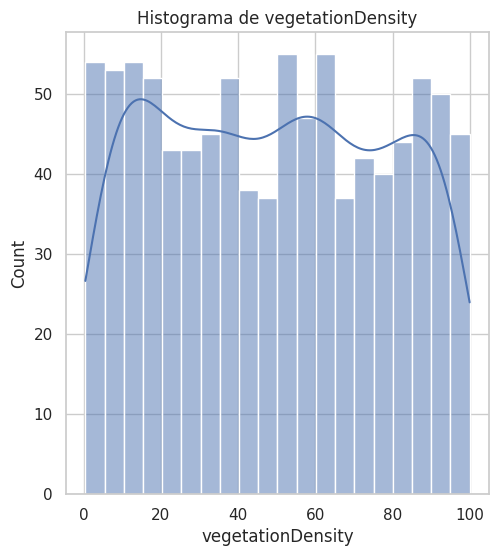

In [24]:
# Visualizar la distribución de la variable
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df[variable], kde=True, bins=20)
plt.title(f'Histograma de {variable}')

# Interpretación Histograma:

El histograma muestra que la densidad de vegetación en las áreas observadas es bastante variada y está bien repartida en diferentes niveles. No parece que haya un rango específico donde se concentren la mayoría de los valores, ya que los datos están distribuidos de manera uniforme. Sin embargo, se notan algunas pequeñas diferencias, como que hay un poco más de áreas con densidades bajas y altas, y un poco menos en el rango medio. En general, esto sugiere que en el estudio se incluyeron áreas con distintos niveles de vegetación, desde muy poca hasta muy densa.

Boxplot, aunque no lo veo necesario en este tipo de análisis univariado, quería intentarlo

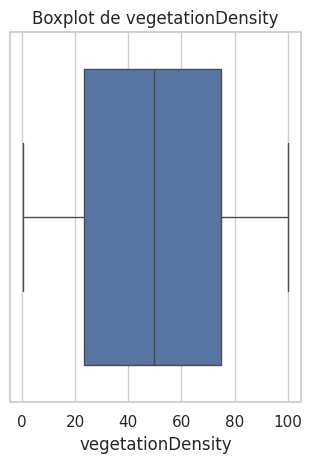

In [26]:
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df[variable])
plt.title(f'Boxplot de {variable}')

plt.tight_layout()
plt.show()